In [1]:
!pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from operator import itemgetter
from collections import Counter



In [3]:
G = nx.read_edgelist('out.csv', delimiter=',')

### EDA

In [4]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Average_Clustering_Coefficient = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {Average_Clustering_Coefficient}")

Average_Shortest_Path = nx.average_shortest_path_length(G)
print(f"Average_Shortest_Path: {Average_Shortest_Path}")

Diameter = nx.diameter(G)
print(f"Diameter: {Diameter}")

Number of nodes: 4941
Number of edges: 6594
Average Clustering Coefficient: 0.08010361108159712
Average_Shortest_Path: 18.989185424445708
Diameter: 46


### Degree/Betweenness/Closeness Centrality

In [5]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

critical_nodes_degree = sorted(degree_centrality, key=degree_centrality.get, reverse=True)
critical_nodes_betweenness = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)
critical_nodes_closeness = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)

print(f"Nodes with highest degree centrality: {critical_nodes_degree[:10]}")
print(f"Nodes with highest betweeness centrality: {critical_nodes_betweenness[:10]}")
print(f"Nodes with highest closeness centrality: {critical_nodes_closeness[:10]}")

Nodes with highest degree centrality: ['2847', '602', '932', '3411', '4436', '558', '2287', '2926', '2865', '3930']
Nodes with highest betweeness centrality: ['651', '559', '1365', '2824', '2685', '1324', '1378', '1213', '433', '2781']
Nodes with highest closeness centrality: ['1378', '1678', '2944', '1377', '2781', '1365', '1368', '1380', '2685', '2795']


We chose these metrics to describe subtations, generators and transformators, because they estimate how much is the network structure dependent on a vertice's presence 

Degree distribution

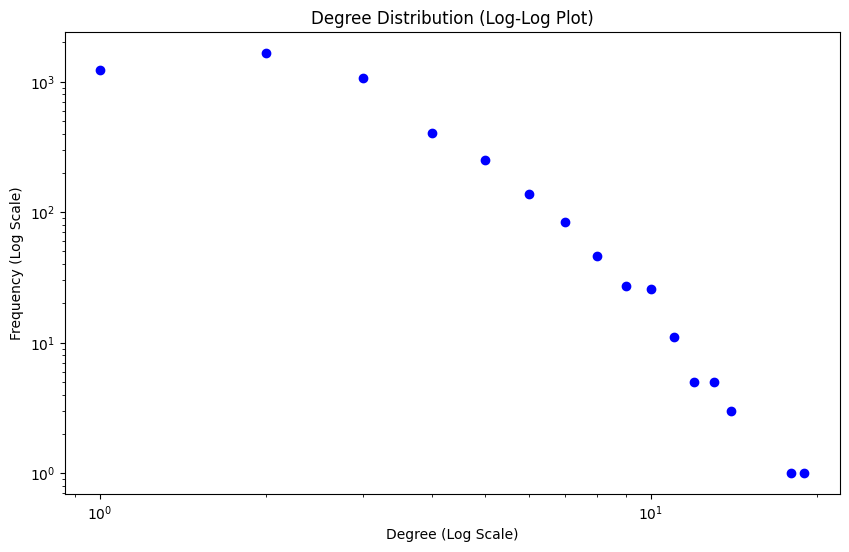

In [6]:
# Calculate the degree of each node
degrees = [degree for node, degree in nx.degree(G)]

# Count the frequency of each degree value
degree_count = Counter(degrees)
deg, cnt = zip(*degree_count.items())

# Prepare for a log-log plot
deg_log = np.log(deg)
cnt_log = np.log(cnt)

# Plot the degree distribution (log-log plot)
plt.figure(figsize=(10, 6))
plt.scatter(deg, cnt, color='blue', marker='o')
plt.xscale('log')
plt.yscale('log')  # Setting both axes to log scale
plt.title("Degree Distribution (Log-Log Plot)")
plt.xlabel("Degree (Log Scale)")
plt.ylabel("Frequency (Log Scale)")

plt.show()

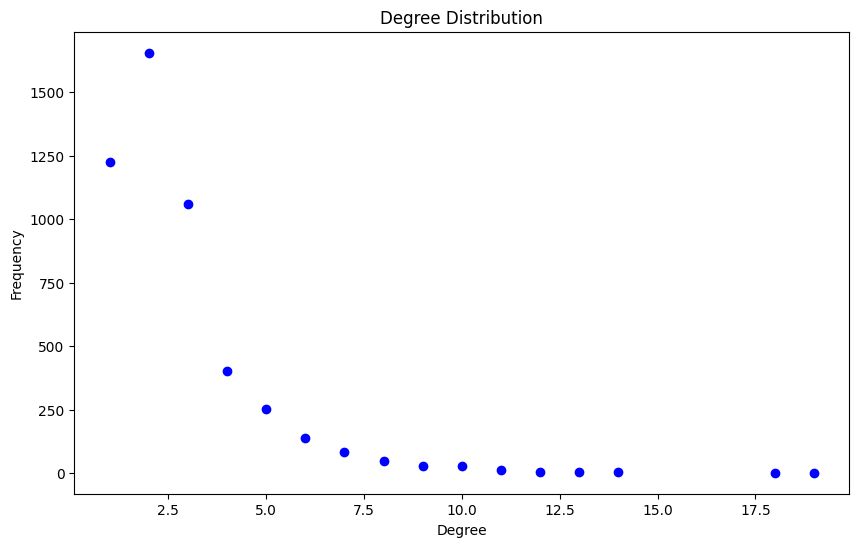

In [7]:
degrees = [degree for node, degree in nx.degree(G)]

# Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.scatter(deg, cnt, color='blue', marker='o')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")

plt.show()

<img src="image-20231220-171950.png" width="" align="" />

### CCDF of Degree Distribution

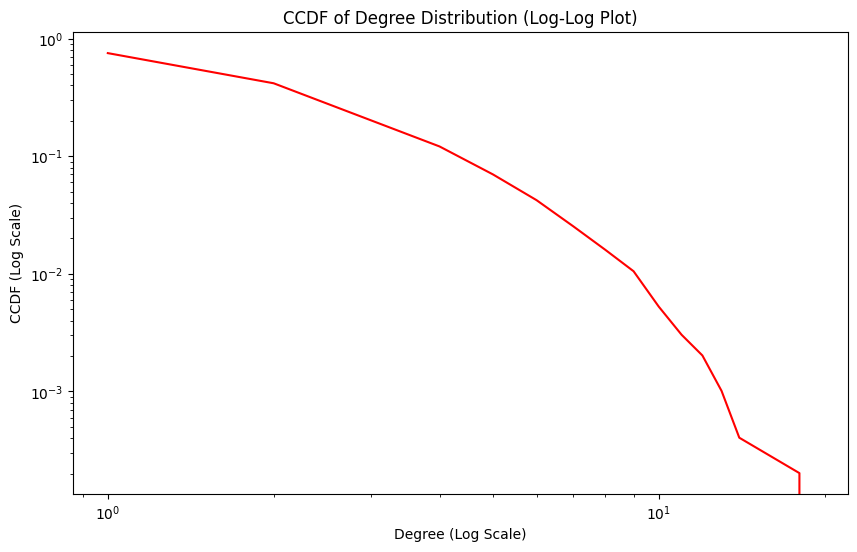

In [8]:
 # Sort the degrees and their counts
sorted_degrees = np.array(deg)
sorted_counts = np.array(cnt)
indices = sorted_degrees.argsort()
sorted_degrees = sorted_degrees[indices]
sorted_counts = sorted_counts[indices]

# Calculate the cumulative counts
cumulative_counts = np.cumsum(sorted_counts)

# Calculate the CCDF (1 - CDF)
total_count = cumulative_counts[-1]
ccdf = 1 - cumulative_counts / total_count

# Plotting the CCDF on a log-log scale
plt.figure(figsize=(10, 6))
plt.plot(sorted_degrees, ccdf, color='red', linestyle='-')
plt.xscale('log')
plt.yscale('log')
plt.title("CCDF of Degree Distribution (Log-Log Plot)")
plt.xlabel("Degree (Log Scale)")
plt.ylabel("CCDF (Log Scale)")
plt.show()


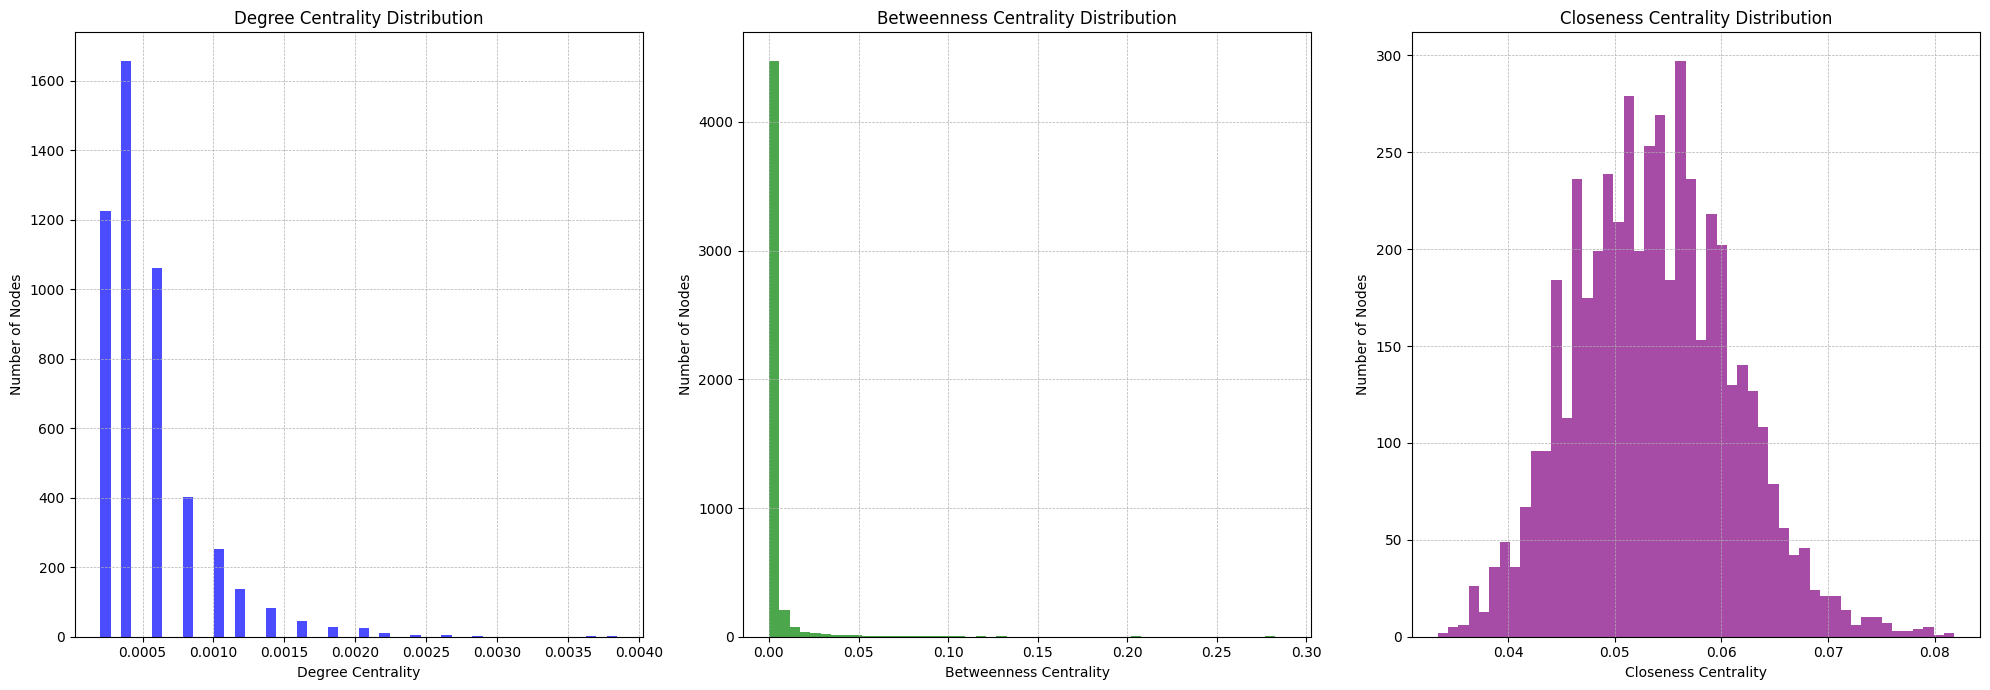

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(20, 7))
values = list(degree_centrality.values())

# Degree centrality
ax[0].hist(values, bins=50, color='blue', alpha=0.7)
ax[0].set_title("Degree Centrality Distribution")
ax[0].set_xlabel("Degree Centrality")
ax[0].set_ylabel("Number of Nodes")
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Betweenness centrality
ax[1].hist(list(betweenness_centrality.values()), bins=50, color='green', alpha=0.7)
ax[1].set_title("Betweenness Centrality Distribution")
ax[1].set_xlabel("Betweenness Centrality")
ax[1].set_ylabel("Number of Nodes")
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Betweenness centrality
ax[2].hist(list(closeness_centrality.values()), bins=50, color='purple', alpha=0.7)
ax[2].set_title("Closeness Centrality Distribution")
ax[2].set_xlabel("Closeness Centrality")
ax[2].set_ylabel("Number of Nodes")
ax[2].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Nodes with *high degree centrality*, *high closeness centrality* and *high betweenness centrality* are likely to be **substations**

Nodes with *low degree centrality*, *low closeness centrality* and *low betweenness centrality* could be potential **generators**

Nodes with *moderate degree centrality*, *moderate closeness centrality* and *varying betweenness centrality* might be **transformers**, especially if they connect clusters within the network.

In [10]:
print(G.degree(critical_nodes_degree))



[('2847', 19), ('602', 18), ('932', 14), ('3411', 14), ('4436', 14), ('558', 13), ('2287', 13), ('2926', 13), ('2865', 13), ('3930', 13), ('1210', 12), ('2525', 12), ('2535', 12), ('2543', 12), ('2554', 12), ('443', 11), ('1480', 11), ('556', 11), ('1057', 11), ('1217', 11), ('4422', 11), ('4452', 11), ('4453', 11), ('4417', 11), ('4434', 11), ('4438', 11), ('142', 10), ('1041', 10), ('1448', 10), ('1434', 10), ('2762', 10), ('3182', 10), ('670', 10), ('1168', 10), ('1257', 10), ('1310', 10), ('1304', 10), ('2521', 10), ('2783', 10), ('2866', 10), ('2906', 10), ('2599', 10), ('2861', 10), ('3223', 10), ('3440', 10), ('3452', 10), ('3888', 10), ('4407', 10), ('4411', 10), ('4427', 10), ('4437', 10), ('4432', 10), ('3397', 9), ('67', 9), ('2316', 9), ('2326', 9), ('560', 9), ('691', 9), ('969', 9), ('947', 9), ('1199', 9), ('1205', 9), ('1289', 9), ('2367', 9), ('2616', 9), ('2604', 9), ('2524', 9), ('2527', 9), ('2958', 9), ('2790', 9), ('3066', 9), ('2719', 9), ('2876', 9), ('3444', 9)

In [11]:
# Assuming degree_centrality, betweenness_centrality, closeness_centrality are dictionaries
num_nodes = len(G.nodes())
top_25_percent = int(0.25 * num_nodes)
middle_50_percent_start = top_25_percent
middle_50_percent_end = num_nodes - top_25_percent
top_5_percent = int(0.05 * num_nodes)
top_10_percent = int(0.10 * num_nodes)

# Substations: High in all three centralities
substations = set(critical_nodes_degree[:top_5_percent]) | set(critical_nodes_degree[:top_10_percent]) & \
              set(critical_nodes_betweenness[:top_10_percent]) & \
              set(critical_nodes_closeness[:top_10_percent])


# Generators: Low in all three centralities
generators = set(critical_nodes_degree[-top_25_percent:]) & \
             set(critical_nodes_betweenness[-top_25_percent:]) & \
             set(critical_nodes_closeness[-top_25_percent:])

# Transformers: Moderate in degree and closeness, varying in betweenness
transformers = (set(critical_nodes_degree[middle_50_percent_start:middle_50_percent_end]) & \
                set(critical_nodes_closeness[middle_50_percent_start:middle_50_percent_end])) - \
               substations - generators


In [12]:
# Sorted values

sorted_substations = sorted(substations, key=lambda node: G.degree(node), reverse=True)
sorted_generators = sorted(generators, key=lambda node: G.degree(node), reverse=True)
sorted_transformers = sorted(transformers, key=lambda node: G.degree(node), reverse=True)

In [13]:
# Getting regular nodes (homes)
all_nodes = set(G.nodes())
special_nodes = substations.union(generators, transformers)
regular_nodes = all_nodes - special_nodes


In [14]:
NODES_NUM = len(critical_nodes_degree)

# first node has more neighbors than the last

high1 = critical_nodes_closeness[-int(NODES_NUM/2):]
high2 = critical_nodes_degree[-int(NODES_NUM/2):]
high3 = critical_nodes_betweenness[-int(NODES_NUM/2):]

intersect = list(set(high1) & set(high2) & set(high3))

print(len(intersect))
print(len(G.nodes))

1198
4941


### Simulating attacks 

In [15]:
def simulate_random_failures(G, failure_rate):
    H = G.copy()
    failed_nodes = random.sample(H.nodes(), failure_rate)
    H.remove_nodes_from(failed_nodes)
    return H

In [16]:
def simulate_targeted_attacks_by_nodes(G, sorted_nodes, num_nodes_to_remove):
    H = G.copy()
    for node in sorted_nodes[:num_nodes_to_remove]:
        if H.has_node(node):
            H.remove_node(node)
    return H

### LCC for analyzing the impact

In [17]:
def largest_connected_component_size(H):
    if len(H) == 0:
        return 0
    largest_cc = max(nx.connected_components(H), key=len)
    lcc_size = len(largest_cc)
    lcc_percentage = (lcc_size / 4941)  # Calculate percentage
    return lcc_percentage

### Simulation

In [18]:
# Random attacks
num_nodes_to_remove_rnd = range(1, len(G.nodes()) + 1)
lcc_sizes_random = []

for rate in num_nodes_to_remove_rnd:
    H = simulate_random_failures(G, rate)
    lcc_size = largest_connected_component_size(H)
    lcc_sizes_random.append(lcc_size)

/tmp/ipykernel_37/2248765374.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  failed_nodes = random.sample(H.nodes(), failure_rate)


In [ ]:
def simulate_random_failures_average(G, num_simulations):
    num_nodes_to_remove_rnd = range(1, len(G.nodes()) + 1)
    lcc_sizes_random_all = []

    # Running the simulation 'num_simulations' times
    for _ in range(num_simulations):
        lcc_sizes_random = []
        for rate in num_nodes_to_remove_rnd:
            H = simulate_random_failures(G, rate)
            lcc_size = largest_connected_component_size(H)
            lcc_sizes_random.append(lcc_size)
        lcc_sizes_random_all.append(lcc_sizes_random)

    # Calculating the average for each number of nodes removed
    lcc_sizes_random_average = np.mean(lcc_sizes_random_all, axis=0)
    
    return lcc_sizes_random_average

# Example usage
num_simulations = 5
lcc_sizes_random_avg = simulate_random_failures_average(G, num_simulations)

/tmp/ipykernel_37/2248765374.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  failed_nodes = random.sample(H.nodes(), failure_rate)


In [ ]:
print(lcc_sizes_random_avg)

[9.99716657e-01 9.99595224e-01 9.98745193e-01 ... 2.02388181e-04
 2.02388181e-04 0.00000000e+00]


For targeted attacks we remove substations, transformers and generators. Since the sample size of their number of nodes is different, we keep an equal number of nodes being deleted, by adding to the lists regular nodes (like homes)

The max number of possibly deleted nodes is 3233. This is because the lowest number of nodes persists in generators, and adding all the regular nodes we obtain the number 3233

In [ ]:
print("With regular nodes:")
print(f"Substations {len(sorted_substations) + len(regular_nodes)}")
print(f"Transformers {len(sorted_transformers) + len(regular_nodes)}")
print(f"Generators {len(sorted_generators) + len(regular_nodes)}\n")

print("Without regular nodes:")
print(f"Substations {len(sorted_substations)}")
print(f"Transformers {len(sorted_transformers)}")
print(f"Generators {len(sorted_generators)}")

With regular nodes:
Substations 3241
Transformers 4191
Generators 3233

Without regular nodes:
Substations 379
Transformers 1329
Generators 371


In [ ]:
sorted_substations_reg = sorted_substations.copy()
sorted_substations_reg.extend(regular_nodes)

sorted_transformers_reg = sorted_transformers.copy()
sorted_transformers_reg.extend(regular_nodes)

sorted_generators_reg = sorted_generators.copy()
sorted_generators_reg.extend(regular_nodes)

In [ ]:
# Targeted attacks for substations
num_nodes_to_remove_trg_sub = range(len(sorted_substations_reg))[:3233]
lcc_sizes_targeted_substations = []

for num in num_nodes_to_remove_trg_sub:
    H = simulate_targeted_attacks_by_nodes(G, sorted_substations_reg, num)
    lcc_size = largest_connected_component_size(H)
    lcc_sizes_targeted_substations.append(lcc_size)

In [ ]:
# Targeted attacks for transformators
num_nodes_to_remove_trg_transf = range(len(sorted_transformers_reg))[:3233]
lcc_sizes_targeted_transformators = []

for num in num_nodes_to_remove_trg_transf:
    H = simulate_targeted_attacks_by_nodes(G, sorted_transformers_reg, num)
    lcc_size = largest_connected_component_size(H)
    lcc_sizes_targeted_transformators.append(lcc_size)

In [ ]:
# Targeted attacks for generators
num_nodes_to_remove_trg_gen = range(len(sorted_generators_reg))[:3233]
lcc_sizes_targeted_generators = []

for num in num_nodes_to_remove_trg_gen:
    H = simulate_targeted_attacks_by_nodes(G, sorted_generators_reg, num)
    lcc_size = largest_connected_component_size(H)
    lcc_sizes_targeted_generators.append(lcc_size)

In [ ]:
print(lcc_sizes_random)

[0.9997976118194697, 0.9995952236389395, 0.9987856709168185, 0.998380894555758, 0.9985832827362882, 0.9969641772920461, 0.9973689536531066, 0.998380894555758, 0.9973689536531066, 0.9969641772920461, 0.9961546245699251, 0.9963570127504554, 0.9963570127504554, 0.9957498482088646, 0.9933211900425015, 0.993725966403562, 0.9957498482088646, 0.9927140255009107, 0.9931188018619712, 0.9941307427646225, 0.9949402954867436, 0.9894758146124266, 0.9933211900425015, 0.9931188018619712, 0.9888686500708359, 0.993725966403562, 0.991297308237199, 0.990487755515078, 0.985023274640761, 0.991297308237199, 0.985023274640761, 0.9923092491398502, 0.99210686095932, 0.9902853673345476, 0.9896782027929569, 0.983404169196519, 0.9906901436956081, 0.9854280510018215, 0.9870471564460636, 0.9892734264318964, 0.9862376037239425, 0.985832827362882, 0.9874519328071241, 0.9856304391823517, 0.9821898401133374, 0.985832827362882, 0.9838089455575795, 0.9848208864602307, 0.985832827362882, 0.9799635701275046, 0.982594616474

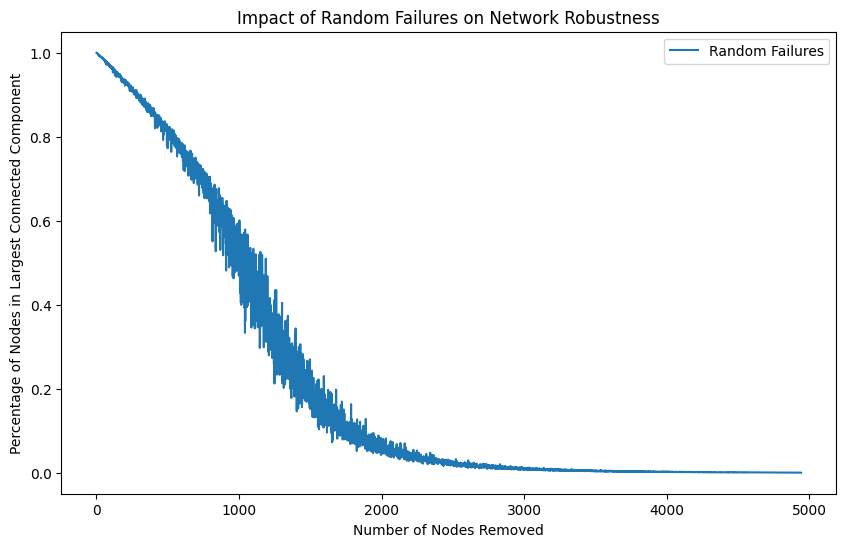

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(num_nodes_to_remove_rnd, lcc_sizes_random_avg, label='Random Failures', linestyle='-')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Percentage of Nodes in Largest Connected Component')
plt.title('Impact of Random Failures on Network Robustness')
plt.legend()
plt.show()

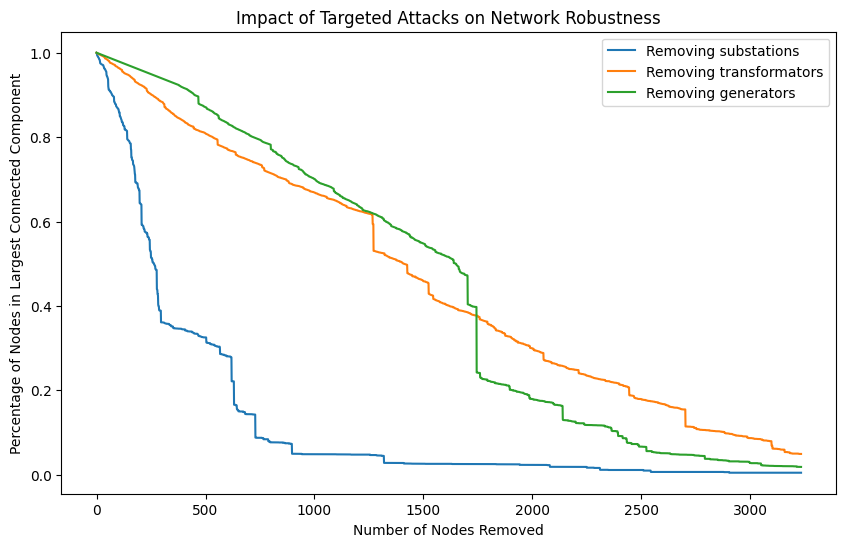

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(num_nodes_to_remove_trg_sub, lcc_sizes_targeted_substations, label='Removing substations')
plt.plot(num_nodes_to_remove_trg_transf, lcc_sizes_targeted_transformators, label='Removing transformators')
plt.plot(num_nodes_to_remove_trg_gen, lcc_sizes_targeted_generators, label='Removing generators')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Percentage of Nodes in Largest Connected Component')
plt.title('Impact of Targeted Attacks on Network Robustness')
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a0ec0982-38fb-4f98-8f2c-65234f1c2d2c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>